# Problem Statement : In this problem we are supposed to predict the life expentancy from the data set while considering all other columns as variables.  First we have to use KNN to find the life expectancy then use Linear Regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [3]:
# Run this line at the start of each model
df = pd.read_csv('gapminder11.csv')

---

In [4]:
df1 = df

In [5]:
df1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [6]:
df1.shape

(139, 10)

In [7]:
df1.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

## KNN Regression: Y column is life, X column is everything else. Please include in comments on whether the Region column needs to be one hot encoded or label encoded and why 

## As the Region column has different locations we are supposed to do one hot encoding. Label encoding will assign differnt locations from 0 to 5 and then rate them as 0<1<2<3<4<5 which is not true.
## But here OHE will be in string which will not be taken by KNN model. Hence we use "Label Encoding"

In [8]:
le = preprocessing.LabelEncoder()
le.fit(df1['Region'])
df1['Region'] = le.transform(df1['Region'])

In [9]:
df1['Region'].head()

0    3
1    5
2    0
3    2
4    1
Name: Region, dtype: int64

In [10]:
df1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1


In [11]:
df1.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region               int64
dtype: object

In [12]:
X = df1.drop(["life"],1)
Y = df1["life"]

In [13]:
knn = KNeighborsRegressor(3)

In [14]:
# r2 score by KNN method
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.3, random_state = 42)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
r23 = r2_score(Y_test,Y_pred)

In [15]:
r23

-0.2786310159062324

In [16]:
knn = KNeighborsRegressor(5)

In [17]:
# r2 score by KNN method
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.3, random_state = 42)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
r25 = r2_score(Y_test,Y_pred)

In [18]:
r25

-0.19020559309315854

In [19]:
knn = KNeighborsRegressor(7)
# r2 score by KNN method
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.3, random_state = 42)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
r27 = r2_score(Y_test,Y_pred)
r27

-0.1510912378886411

In [20]:
knn = KNeighborsRegressor(9)
# r2 score by KNN method
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.3, random_state = 42)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
r29 = r2_score(Y_test,Y_pred)
r29

-0.20961038721538183

In [21]:
knn = KNeighborsRegressor(11)
# r2 score by KNN method
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.3, random_state = 42)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
r211 = r2_score(Y_test,Y_pred)
r211

-0.17779180382990245

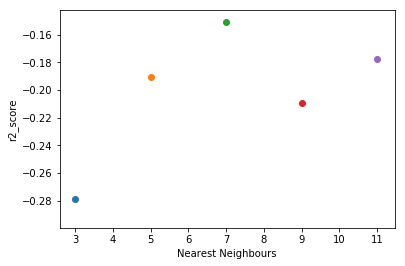

In [22]:
import matplotlib.pyplot as plt
plt.scatter(3,r23)
plt.scatter(5,r25)
plt.scatter(7,r27)
plt.scatter(9,r29)
plt.scatter(11,r211)
plt.xlabel('Nearest Neighbours')
plt.ylabel('r2_score')
plt.show()

## As the number of neighbours increases r2 score decreases. For our KNN r2 score with neighbours 3 is the best. But as r2 score is negative, this implies our model is not the best fit.

------

---

## KNN Classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts1
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('gapminder11.csv')

In [25]:
df2 = df

In [26]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [27]:
X1=df2.drop(['Region'],1)
Y1=df2['Region']

## Here we have to use one hot encoding as 'Region' column is what we are predicting. Label encoding will rate Region column from 0 to 5 which is not the case. We need to give equal weightage to every region in Region feature.

In [28]:
df2 = pd.get_dummies(df2)
df2_scaled = StandardScaler().fit_transform(df2)

/Users/abhishekjambhale/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/abhishekjambhale/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
knn = KNeighborsClassifier(3)
X1_train,X1_test,Y1_train,Y1_test = tts1(X1,Y1,test_size = 0.3, random_state = 42)
knn.fit(X1_train,Y1_train)
Y1_pred = knn.predict(X1_test)
accu_13 = accuracy_score(Y1_test,Y1_pred)
accu_13

0.19047619047619047

In [30]:
knn = KNeighborsClassifier(5)
X1_train,X1_test,Y1_train,Y1_test = tts1(X1,Y1,test_size = 0.3, random_state = 42)
knn.fit(X1_train,Y1_train)
Y1_pred = knn.predict(X1_test)
accu_15 = accuracy_score(Y1_test,Y1_pred)
accu_15

0.2857142857142857

In [31]:
knn = KNeighborsClassifier(7)
X1_train,X1_test,Y1_train,Y1_test = tts1(X1,Y1,test_size = 0.3, random_state = 42)
knn.fit(X1_train,Y1_train)
Y1_pred = knn.predict(X1_test)
accu_17 = accuracy_score(Y1_test,Y1_pred)
accu_17

0.2619047619047619

In [32]:
knn = KNeighborsClassifier(9)
X1_train,X1_test,Y1_train,Y1_test = tts1(X1,Y1,test_size = 0.3, random_state = 42)
knn.fit(X1_train,Y1_train)
Y1_pred = knn.predict(X1_test)
accu_19 = accuracy_score(Y1_test,Y1_pred)
accu_19

0.2857142857142857

In [33]:
knn = KNeighborsClassifier(11)
X1_train,X1_test,Y1_train,Y1_test = tts1(X1,Y1,test_size = 0.3, random_state = 42)
knn.fit(X1_train,Y1_train)
Y1_pred = knn.predict(X1_test)
accu_111 = accuracy_score(Y1_test,Y1_pred)
accu_111

0.38095238095238093

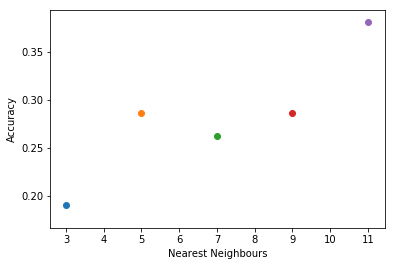

In [34]:
import matplotlib.pyplot as plt
plt.scatter(3,accu_13)
plt.scatter(5,accu_15)
plt.scatter(7,accu_17)
plt.scatter(9,accu_19)
plt.scatter(11,accu_111)
plt.xlabel('Nearest Neighbours')
plt.ylabel('Accuracy')
plt.show()

## We can conclude from above graph that as the number of nearest neighbours increases the accuracy of our model also increases.

---

---

---

## Assumptions of Linear Regression
## 1) Linear relationship
## 2) Multivariate normality
## 3) No or little multicollinearity
## 4) No auto-correlation
## 5) Homoscedasticity
Ref: https://www.statisticssolutions.com/assumptions-of-linear-regression/

---

---

## Linear Regression

In [35]:
df = pd.read_csv('gapminder11.csv')

In [36]:
df3 = df

## Pearson correlation heat map

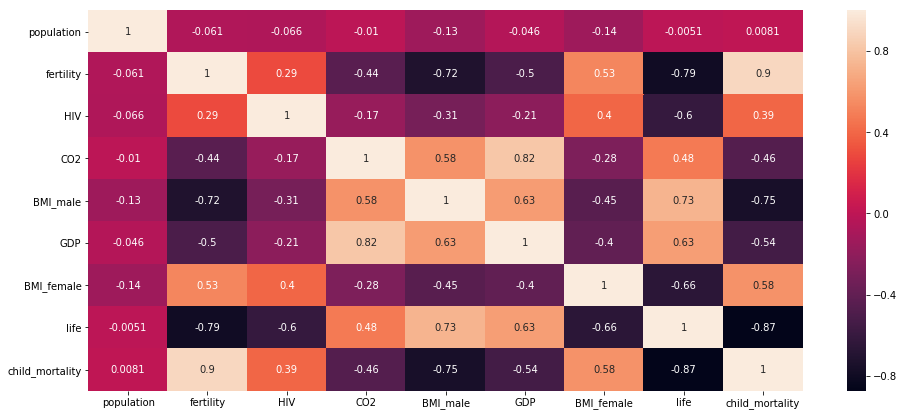

In [37]:
plt.figure(figsize=(16,7))
sns.heatmap(df3.corr(),annot=True)

## LR

## From Pearson correlation heat map, we find that the features to be selected are (Fertility, HIV, BMI_Male & Female, Child_mortality)

In [38]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [39]:
X = X[['fertility','HIV','BMI_male','BMI_female','child_mortality']]
Y = df3['life']

In [40]:
X_train, X_test, Y_train,Y_test = tts(X,Y,test_size=0.3,random_state=42)
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
print('r2 Score of LinearRegression model is : ', r2_score(Y_test,Y_pred))

r2 Score of LinearRegression model is :  0.8042787701290108


---

---

## Statsmodel - Backward elimination

In [41]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
df = pd.read_csv('gapminder11.csv')

In [43]:
df4=df

In [44]:
df4 = df4.drop(['Region'],1)

In [45]:
X = df4.drop(['life'],1)
Y = df4['life']

In [46]:
df4.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


## Features selection by statsmodel is done by selecting features having "p" value less than 0.05 i.e. 5%

In [47]:
df4 = scaler.fit_transform(df4)
X = sm.add_constant(X)
model_1 = sm.OLS(Y,X.astype(float)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     142.8
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.48e-60
Time:                        20:51:14   Log-Likelihood:                -345.49
No. Observations:                 139   AIC:                             709.0
Df Residuals:                     130   BIC:                             735.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              98.2083     10.759      9.128      0.000      76.922     119.494
population      -1.581e-09   2.49e-09     -0.636      0.526    -6.5e-09    3.34e-09
fertility          -0.4555      0.384     -1.188      0.237      -1.214       0.303
HIV                -0.5991      0.066     -9.074      0.000      -0.730      -0.468
CO2                -0.2041      0.074     -2.761      0.007      -0.350      -0.058
BMI_male            0.3324      0.200      1.659      0.100      -0.064       0.729
GDP                 0.0001   2.56e-05      5.448      0.000    8.87e-05       0.000
BMI_female         -0.2485      0.074     -3.338      0.001      -0.396      -0.101
child_mortality    -0.0919      0.015     -6.173      0.000      -0.121      -0.062
==============================================================================
Omnibus:                        7.456   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.236
Skew:                          -0.385   Prob(JB):                       0.0163
Kurtosis:                       3.911   Cond. No.                     4.85e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Drop population by Backward elimination
X = X.drop(['population'],1)
model_2 = sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.36e-61
Time:                        20:51:14   Log-Likelihood:                -345.71
No. Observations:                 139   AIC:                             707.4
Df Residuals:                     131   BIC:                             730.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              96.3158     10.316      9.337      0.000      75.909     116.723
fertility          -0.4067      0.375     -1.085      0.280      -1.148       0.335
HIV                -0.5958      0.066     -9.072      0.000      -0.726      -0.466
CO2                -0.2088      0.073     -2.845      0.005      -0.354      -0.064
BMI_male            0.3621      0.194      1.862      0.065      -0.023       0.747
GDP                 0.0001   2.54e-05      5.510      0.000    8.99e-05       0.000
BMI_female         -0.2405      0.073     -3.285      0.001      -0.385      -0.096
child_mortality    -0.0930      0.015     -6.311      0.000      -0.122      -0.064
==============================================================================
Omnibus:                        6.734   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.244
Skew:                          -0.360   Prob(JB):                       0.0267
Kurtosis:                       3.856   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Drop fertility by Backward elimination
X = X.drop(['fertility'],1)
model_3 = sm.OLS(Y,X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     190.7
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.69e-62
Time:                        20:51:14   Log-Likelihood:                -346.33
No. Observations:                 139   AIC:                             706.7
Df Residuals:                     132   BIC:                             727.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              95.4596     10.292      9.275      0.000      75.100     115.819
HIV                -0.5836      0.065     -9.013      0.000      -0.712      -0.456
CO2                -0.2050      0.073     -2.794      0.006      -0.350      -0.060
BMI_male            0.3902      0.193      2.023      0.045       0.009       0.772
GDP                 0.0001   2.54e-05      5.454      0.000    8.84e-05       0.000
BMI_female         -0.2446      0.073     -3.343      0.001      -0.389      -0.100
child_mortality    -0.1053      0.009    -11.155      0.000      -0.124      -0.087
==============================================================================
Omnibus:                        6.880   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.887
Skew:                          -0.336   Prob(JB):                       0.0194
Kurtosis:                       3.955   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The features given by Backward Elimination are - HIV, CO2, BMI_Male & Female, GDP, Child_moriarty
## The features given by pearson heat map were - Fertility, HIV, BMI_Male & Female, Child_mortality
## This two features group given by BE and PHM are not the same.

In [50]:
X = X.drop(['const'],1)

In [51]:
X.head()

,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,0.1,18.016313,27.56373,41312.0,117.3755,5.2


In [52]:
X_train, X_test, Y_train,Y_test = tts(X,Y,test_size=0.3,random_state=42)
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
print('r2 Score of LinearRegression model is : ', r2_score(Y_test,Y_pred))

r2 Score of LinearRegression model is :  0.8371634180856427


## r2 score of LR model by pearson heat map feature selection process is less than r2 score of LR model by Statsmodel with Backward elimination feature selection process.

---

---

---

## RFE - Reccursive Feature Elimination

In [53]:
# Reccursive feature Elimination
from sklearn.feature_selection import RFE

In [54]:
df = pd.read_csv('gapminder11.csv')

In [55]:
df5 = df

In [56]:
df5 = df5.drop(['Region'],1)

In [57]:
X = df5.drop(['life'],1)
Y = df5['life']

In [58]:
df5.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [59]:
lin_reg = LinearRegression()
RFE(lin_reg,4)
rfe = RFE(lin_reg,4)
fit = rfe.fit(X,Y)
print("Num Feature: %s" %(fit.n_features_))
print("Selected Features: %s" %(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))

Num Feature: 4
Selected Features: [False  True  True False  True False  True False]
Feature Ranking: [5 1 1 3 1 4 1 2]


In [60]:
fit = list(fit.support_)

In [61]:
list(X)

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'child_mortality']

## Features selected by RFE are - 'fertility', 'HIV', 'BMI_Male & Female'